# GALAH DR4 Post Processing

This script is used to follow up the spectroscopic analysis and post-process things like binarity etc.

The code is maintained at
https://github.com/svenbuder/GALAH_DR4
and described at
https://github.com/svenbuder/galah_dr4_paper

Author(s): Sven Buder (ANU, ASTRO 3D)

History:  
220616: Created

In [41]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
    %config Completer.use_jedi = False
except:
    pass

import numpy as np
import sys
import pickle
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table

In [24]:
print('What about the appearance of TiO at 6680?')

What about the appearance of TiO at 6680?


In [91]:
dr4_all = Table.read('../spectrum_post_processing/galah_dr4_allspec_not_validated.fits')
dr3_all = Table.read('../../GALAH_DR3/catalogs/GALAH_DR3_main_allspec_v2.fits')
dr60_all = Table.read('../auxiliary_information/dr6.0.fits')
gaia_dr3_all = Table.read('../../Surveys/Gaia_DR3/gaiadr3.gaia_source_xmatch_galah.fits')

In [190]:
sobject_id = 131216001601045
sobject_id = 131216001101353
sobject_id = 131216001101387
sobject_id = 131216001601045
sobject_id = 131216002101244
sobject_id = 131216002101276
sobject_id = 131217002301092
sobject_id = 131217002301135 # actually only wrong rv
sobject_id = 131217002801014
sobject_id = 131217002801062
sobject_id = 131217002801096
sobject_id = 131217002801102
sobject_id = 131217003301017
sobject_id = 131217003301330

In [191]:
dr4 = dr4_all[dr4_all['sobject_id']==sobject_id]
dr4

sobject_id,tmass_id,gaiadr3_source_id,flag_sp,chi2_sp,model_name,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h,vmic,e_vmic,vsini,e_vsini,li_fe,e_li_fe,flag_li_fe,c_fe,e_c_fe,flag_c_fe,n_fe,e_n_fe,flag_n_fe,o_fe,e_o_fe,flag_o_fe,na_fe,e_na_fe,flag_na_fe,mg_fe,e_mg_fe,flag_mg_fe,al_fe,e_al_fe,flag_al_fe,si_fe,e_si_fe,flag_si_fe,k_fe,e_k_fe,flag_k_fe,ca_fe,e_ca_fe,flag_ca_fe,sc_fe,e_sc_fe,flag_sc_fe,ti_fe,e_ti_fe,flag_ti_fe,v_fe,e_v_fe,flag_v_fe,cr_fe,e_cr_fe,flag_cr_fe,mn_fe,e_mn_fe,flag_mn_fe,co_fe,e_co_fe,flag_co_fe,ni_fe,e_ni_fe,flag_ni_fe,cu_fe,e_cu_fe,flag_cu_fe,zn_fe,e_zn_fe,flag_zn_fe,rb_fe,e_rb_fe,flag_rb_fe,sr_fe,e_sr_fe,flag_sr_fe,y_fe,e_y_fe,flag_y_fe,zr_fe,e_zr_fe,flag_zr_fe,mo_fe,e_mo_fe,flag_mo_fe,ru_fe,e_ru_fe,flag_ru_fe,ba_fe,e_ba_fe,flag_ba_fe,la_fe,e_la_fe,flag_la_fe,ce_fe,e_ce_fe,flag_ce_fe,nd_fe,e_nd_fe,flag_nd_fe,sm_fe,e_sm_fe,flag_sm_fe,eu_fe,e_eu_fe,flag_eu_fe,sb2_rv_16,sb2_rv_50,sb2_rv_84,ew_h_beta,ew_h_alpha,ew_k_is,sigma_k_is,rv_k_is,ew_dib5780,sigma_dib5780,rv_dib5780,ew_dib5797,sigma_dib5797,rv_dib5797,ew_dib6613,sigma_dib6613,rv_dib6613,snr [4]
int64,bytes16,int64,int64,float32,bytes16,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
131217003301330,07052958-5704250,5489907500753295616,4,1.6078428,5250_4.50_-0.25,4965.3525,14.061147,4.855278,0.022898585,-0.61407185,0.01757782,1,-0.5682119,0.060357656,10.593245,0.34732008,-0.6309051,0.23311354,1,0.3959729,0.033417474,0,0.12122922,0.071791455,0,-0.39207643,0.09075927,0,1.0218765,0.034610115,0,0.8496161,0.021571402,0,1.0105367,0.062319424,0,0.50607544,0.044533137,0,1.8369292,0.048437208,0,1.2228041,0.02330693,0,0.28553268,0.058175504,0,1.1983484,0.031159407,0,0.81815034,0.02985149,0,0.49953002,0.03851664,0,0.08738089,0.061164353,0,-0.064574204,0.06640775,1,-0.023629364,0.03985194,0,-0.011178556,0.0670956,0,0.9480038,0.12715186,0,--,--,2,--,--,2,-1.6793096,0.20769748,1,0.029003982,0.16823675,1,--,--,2,--,--,2,0.882514,0.032425467,0,--,--,2,--,--,2,0.8054125,0.13833944,0,--,--,2,--,--,2,-241.9,-220.5,-210.44,-0.13420731,-0.106039435,0.04981166,0.13508973,-76.33293,0.44218385,1.6271135,-157.73428,-0.009404887,0.014445437,-42.963524,0.009495944,0.04719318,-5.6739774,11.575458 .. 38.81584


In [192]:
dr60 = dr60_all[dr60_all['sobject_id']==sobject_id]
dr60

sobject_id,ra,dec,ra_icrs,dec_icrs,mjd,utdate,epoch,mjd_s,utdate_s,epoch_s,mjd_e,utdate_e,epoch_e,aperture,pivot,fibre,fibre_x,fibre_y,fibre_theta,plate,aperture_position [4],mean_ra,mean_dec,mean_zd,mean_airmass,mean_ha,cfg_file,cfg_field_name,obj_name,galah_id,2mass,gaia_id,snr [4],snr_AA [4],fibre_throughput [4],telluric_h2o [4],telluric_o2 [4],res [4],b_par [4],v_bary_eff,exposed,mag,e_b-v,wav_rms [4],wav_n_lines,n_combined,rv [4],e_rv [4],rv_com,e_rv_com,teff_r,logg_r,fe_h_r,alpha_fe_r,vmic_r,vbroad_r,obs_comment,pipeline_version,reduction_flags
int64,float32,float32,float32,float32,float64,bytes23,float64,float64,bytes23,float64,float64,bytes23,float64,int16,int16,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,bytes48,bytes56,bytes48,bytes16,bytes16,bytes20,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes28,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes56,bytes5,int32
131217003301330,106.373276,-57.07362,106.37355,-57.073235,56643.62531701328,2013-12-17 15:00:27.390,2013.960617306886,56643.5961991692,2013-12-17 14:18:31.608,2013.96053753197,56643.65443831109,2013-12-17 15:42:23.470,2013.960697091263,315,330,321,89127.0,49298.0,5.149619,1,3322.174 .. 3332.632,105.972374,-57.449795,26.827791,1.1206151,-5.461727,268m21.PM_p1.sds,268m21.PM,P0805,None,07052958-5704250,5489907500753295616,11.575458 .. 38.81584,53.974262 .. 143.17184,0.9000827 .. 0.86350316,2.1548162 .. 2.6602666,-- .. 0.10165997,0.24073601 .. 0.0,2.049 .. 2.0,4.959906,4800.0,11.08,0.1537,0.0183 .. 0.0263,58/62 48/52 37/42 26/30,4,68.45396 .. 65.457214,0.5352109 .. 0.25604212,65.8986,0.2921204,5492.4067,3.467926,-0.2592583,0.6491711,1.4983233,20.627108,--,6.0,0


sobject_id,tmass_id,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,'electron'.s**-1,'electron'.s**-1,,mag,,'electron'.s**-1,'electron'.s**-1,,mag,,'electron'.s**-1,'electron'.s**-1,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
int64,bytes16,int64,bytes28,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,flo

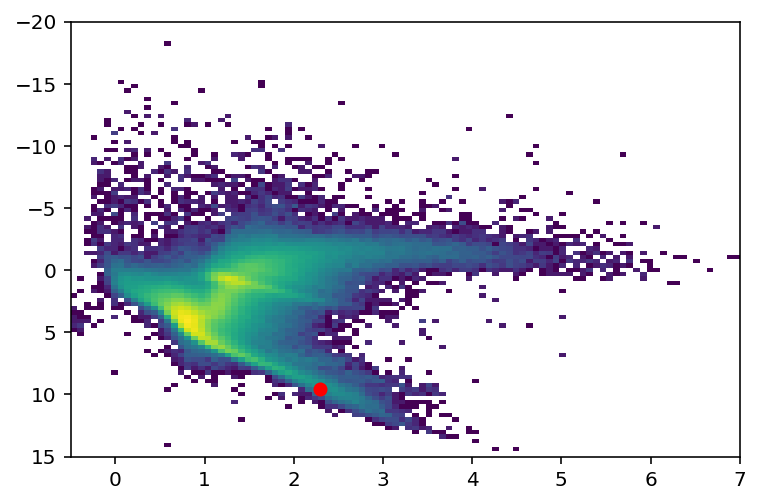

In [193]:
use = np.isfinite(gaia_dr3_all['bp_rp']) & (gaia_dr3_all['parallax'] >= 0.)
plt.hist2d(
    gaia_dr3_all['bp_rp'][use],
    gaia_dr3_all['phot_g_mean_mag'][use] + 5*np.log10(gaia_dr3_all['parallax'][use]/100.),
    bins=100,cmin=1,norm=LogNorm()
)
plt.ylim(15,-20)

gaia_dr3 = gaia_dr3_all[gaia_dr3_all['sobject_id']==sobject_id]

plt.scatter(
    gaia_dr3['bp_rp'],
    gaia_dr3['phot_g_mean_mag'] + 5*np.log10(gaia_dr3['parallax']/100.),
    c='r'
)
gaia_dr3

In [194]:
dr3 = dr3_all[dr3_all['sobject_id']==sobject_id]
dr3

star_id,sobject_id,dr2_source_id,dr3_source_id,survey_name,field_id,flag_repeat,wg4_field,wg4_pipeline,flag_sp,teff,e_teff,irfm_teff,irfm_ebv,irfm_ebv_ref,cov_e_teff,init_teff,logg,e_logg,cov_e_logg,init_logg,fe_h,e_fe_h,cov_e_fe_h,flag_fe_h,fe_h_atmo,e_fe_h_atmo,cov_e_fe_h_atmo,init_fe_h_atmo,vmic,vbroad,e_vbroad,cov_e_vbroad,init_vbroad,mass,lbol,age,chi2_sp,alpha_fe,e_alpha_fe,nr_alpha_fe,flag_alpha_fe,flux_A_Fe,chi_A_Fe,ind_Li6708_fe,ind_cov_e_Li6708,ind_flag_Li6708,ind_Li6708_NoRV_fe,ind_cov_e_Li6708_NoRV,ind_flag_Li6708_NoRV,ind_C6588_fe,ind_cov_e_C6588,ind_flag_C6588,ind_O_fe,ind_cov_e_O,ind_flag_O,ind_Na_fe,ind_cov_e_Na,ind_flag_Na,ind_Mg5711_fe,ind_cov_e_Mg5711,ind_flag_Mg5711,ind_Al_fe,ind_cov_e_Al,ind_flag_Al,ind_Si_fe,ind_cov_e_Si,ind_flag_Si,ind_K7699_fe,ind_cov_e_K7699,ind_flag_K7699,ind_Ca_fe,ind_cov_e_Ca,ind_flag_Ca,ind_Sc_fe,ind_cov_e_Sc,ind_flag_Sc,ind_Ti4758_fe,ind_cov_e_Ti4758,ind_flag_Ti4758,ind_Ti4759_fe,ind_cov_e_Ti4759,ind_flag_Ti4759,ind_Ti4778_fe,ind_cov_e_Ti4778,ind_flag_Ti4778,ind_Ti4782_fe,ind_cov_e_Ti4782,ind_flag_Ti4782,ind_Ti4798_fe,ind_cov_e_Ti4798,ind_flag_Ti4798,ind_Ti4802_fe,ind_cov_e_Ti4802,ind_flag_Ti4802,ind_Ti4820_fe,ind_cov_e_Ti4820,ind_flag_Ti4820,ind_Ti5689_fe,ind_cov_e_Ti5689,ind_flag_Ti5689,ind_Ti5716_fe,ind_cov_e_Ti5716,ind_flag_Ti5716,ind_Ti5720_fe,ind_cov_e_Ti5720,ind_flag_Ti5720,ind_Ti5739_fe,ind_cov_e_Ti5739,ind_flag_Ti5739,ind_Ti5866_fe,ind_cov_e_Ti5866,ind_flag_Ti5866,ind_Ti6599_fe,ind_cov_e_Ti6599,ind_flag_Ti6599,ind_Ti6717_fe,ind_cov_e_Ti6717,ind_flag_Ti6717,ind_Ti7853_fe,ind_cov_e_Ti7853,ind_flag_Ti7853,ind_Ti4720_fe,ind_cov_e_Ti4720,ind_flag_Ti4720,ind_Ti4765_fe,ind_cov_e_Ti4765,ind_flag_Ti4765,ind_Ti4799_fe,ind_cov_e_Ti4799,ind_flag_Ti4799,ind_Ti4849_fe,ind_cov_e_Ti4849,ind_flag_Ti4849,ind_Ti4866_fe,ind_cov_e_Ti4866,ind_flag_Ti4866,ind_Ti4874_fe,ind_cov_e_Ti4874,ind_flag_Ti4874,ind_V4832_fe,ind_cov_e_V4832,ind_flag_V4832,ind_V4784_fe,ind_cov_e_V4784,ind_flag_V4784,ind_V4797_fe,ind_cov_e_V4797,ind_flag_V4797,ind_Cr_fe,ind_cov_e_Cr,ind_flag_Cr,ind_Mn_fe,ind_cov_e_Mn,ind_flag_Mn,ind_Co4781_fe,ind_cov_e_Co4781,ind_flag_Co4781,ind_Co4900_fe,ind_cov_e_Co4900,ind_flag_Co4900,ind_Co5647_fe,ind_cov_e_Co5647,ind_flag_Co5647,ind_Co6490_fe,ind_cov_e_Co6490,ind_flag_Co6490,ind_Co6551_fe,ind_cov_e_Co6551,ind_flag_Co6551,ind_Co6632_fe,ind_cov_e_Co6632,ind_flag_Co6632,ind_Co6679_fe,ind_cov_e_Co6679,ind_flag_Co6679,ind_Co7713_fe,ind_cov_e_Co7713,ind_flag_Co7713,ind_Co7838_fe,ind_cov_e_Co7838,ind_flag_Co7838,ind_Ni5847_fe,ind_cov_e_Ni5847,ind_flag_Ni5847,ind_Ni6586_fe,ind_cov_e_Ni6586,ind_flag_Ni6586,ind_Cu5700_fe,ind_cov_e_Cu5700,ind_flag_Cu5700,ind_Cu5782_fe,ind_cov_e_Cu5782,ind_flag_Cu5782,ind_Zn4722_fe,ind_cov_e_Zn4722,ind_flag_Zn4722,ind_Zn4811_fe,ind_cov_e_Zn4811,ind_flag_Zn4811,ind_Rb7800_fe,ind_cov_e_Rb7800,ind_flag_Rb7800,ind_Sr6550_fe,ind_cov_e_Sr6550,ind_flag_Sr6550,ind_Y_fe,ind_cov_e_Y,ind_flag_Y,ind_Y4820_fe,ind_cov_e_Y4820,ind_flag_Y4820,ind_Y4855_fe,ind_cov_e_Y4855,ind_flag_Y4855,ind_Y4884_fe,ind_cov_e_Y4884,ind_flag_Y4884,ind_Y5663_fe,ind_cov_e_Y5663,ind_flag_Y5663,ind_Y5729_fe,ind_cov_e_Y5729,ind_flag_Y5729,ind_Zr4739_fe,ind_cov_e_Zr4739,ind_flag_Zr4739,ind_Zr4772_fe,ind_cov_e_Zr4772,ind_flag_Zr4772,ind_Zr4806_fe,ind_cov_e_Zr4806,ind_flag_Zr4806,ind_Zr4828_fe,ind_cov_e_Zr4828,ind_flag_Zr4828,ind_Zr5681_fe,ind_cov_e_Zr5681,ind_flag_Zr5681,ind_Mo5689_fe,ind_cov_e_Mo5689,ind_flag_Mo5689,ind_Mo5751_fe,ind_cov_e_Mo5751,ind_flag_Mo5751,ind_Mo5858_fe,ind_cov_e_Mo5858,ind_flag_Mo5858,ind_Mo6619_fe,ind_cov_e_Mo6619,ind_flag_Mo6619,ind_Ru4758_fe,ind_cov_e_Ru4758,ind_flag_Ru4758,ind_Ru4869_fe,ind_cov_e_Ru4869,ind_flag_Ru4869,ind_Ru5699_fe,ind_cov_e_Ru5699,ind_flag_Ru5699,ind_Ba_fe,ind_cov_e_Ba,ind_flag_Ba,ind_La4716_fe,ind_cov_e_La4716,ind_flag_La4716,ind_La4749_fe,ind_cov_e_La4749,ind_flag_La4749,ind_La4804_fe,ind_cov_e_La4804,ind_flag_La4804,ind_La5806_fe,ind_cov_e_La5806,ind_flag_La5806,ind_Ce4774_fe,ind_cov_e_Ce4774,ind_flag_Ce4774,ind_Nd4811_fe,ind_cov_e_Nd4811,ind_flag_Nd4811,

In [203]:
test_cases = dict()
if np.isfinite(dr4['teff'][0]):
    test_cases['galah_dr4         '] = ' '.join(['ipython test_initial_parameters.py',str(sobject_id),"{:.2f}".format(dr4['teff'][0]),"{:.2f}".format(dr4['logg'][0]),"{:.2f}".format(dr4['fe_h'][0]),"{:.2f}".format(dr60['rv_com'][0])])
if np.isfinite(dr60['teff_r'][0]):
    test_cases['galah_dr4_init    '] = ' '.join(['ipython test_initial_parameters.py',str(sobject_id),"{:.2f}".format(dr60['teff_r'][0]),"{:.2f}".format(dr60['logg_r'][0]),"{:.2f}".format(dr60['fe_h_r'][0]),"{:.2f}".format(dr60['rv_com'][0])])
if len(dr3['teff']) > 0:
    if np.isfinite(dr3['fe_h'][0]):
        test_cases['galah_dr3         '] = ' '.join(['ipython test_initial_parameters.py',str(sobject_id),"{:.2f}".format(dr3['teff'][0]),"{:.2f}".format(dr3['logg'][0]),"{:.2f}".format(dr3['fe_h'][0]),"{:.2f}".format(dr3['rv_galah'][0])])
    elif np.isfinite(dr3['fe_h_atmo'][0]):
        if np.isfinite(dr3['rv_galah'][0]):
            test_cases['galah_dr3_atmo    '] = ' '.join(['ipython test_initial_parameters.py',str(sobject_id),"{:.2f}".format(dr3['teff'][0]),"{:.2f}".format(dr3['logg'][0]),"{:.2f}".format(dr3['fe_h_atmo'][0]),"{:.2f}".format(dr3['rv_galah'][0])])
        else:
            test_cases['galah_dr3_atmo    '] = ' '.join(['ipython test_initial_parameters.py',str(sobject_id),"{:.2f}".format(dr3['teff'][0]),"{:.2f}".format(dr3['logg'][0]),"{:.2f}".format(dr3['fe_h_atmo'][0]),"{:.2f}".format(dr3['rv_guess'][0])])
if np.isfinite(gaia_dr3['rv_template_teff'][0]):
    test_cases['gaia_dr3_rv_params'] = ' '.join(['ipython test_initial_parameters.py',str(sobject_id),"{:.2f}".format(gaia_dr3['rv_template_teff'][0]),"{:.2f}".format(gaia_dr3['rv_template_logg'][0]),"{:.2f}".format(gaia_dr3['rv_template_fe_h'][0]),"{:.2f}".format(gaia_dr3['radial_velocity'][0])])
    test_cases['gaia_dr3_no_ccd1  '] = ' '.join(['ipython test_number_ccds.py',str(sobject_id),"{:.2f}".format(gaia_dr3['rv_template_teff'][0]),"{:.2f}".format(gaia_dr3['rv_template_logg'][0]),"{:.2f}".format(gaia_dr3['rv_template_fe_h'][0]),"{:.2f}".format(gaia_dr3['radial_velocity'][0])])
if np.isfinite(gaia_dr3['teff_gspphot'][0]):
    test_cases['gaia_dr3_gspphot  '] = ' '.join(['ipython test_initial_parameters.py',str(sobject_id),"{:.2f}".format(gaia_dr3['teff_gspphot'][0]),"{:.2f}".format(gaia_dr3['logg_gspphot'][0]),"{:.2f}".format(gaia_dr3['mh_gspphot'][0]),"{:.2f}".format(gaia_dr3['radial_velocity'][0])])


In [204]:
test_cases

{'galah_dr4         ': 'ipython test_initial_parameters.py 131217003301330 4965.35 4.86 -0.61 65.90',
 'galah_dr4_init    ': 'ipython test_initial_parameters.py 131217003301330 5492.41 3.47 -0.26 65.90',
 'gaia_dr3_rv_params': 'ipython test_initial_parameters.py 131217003301330 3500.00 4.00 -1.00 67.89',
 'gaia_dr3_no_ccd1  ': 'ipython test_number_ccds.py 131217003301330 3500.00 4.00 -1.00 67.89',
 'gaia_dr3_gspphot  ': 'ipython test_initial_parameters.py 131217003301330 3596.79 4.81 -0.16 67.89'}

In [197]:
dr60['rv_com'][0],dr3['rv_galah'][0],gaia_dr3['radial_velocity'][0]

(65.8986, masked, 67.89351)

In [198]:
dr4['flag_sp']

4
